## Extremely Brief Introduction

In this notebook kernel we are going to be looking at the dataset of video game sales from the 1990's to the current years of the 2015's.
The purpose of exploring this data is to observe the trends and habits that seem to be present in game sales over time. With looking at this data we are also trying to see if we can predict/see where game sales could be going in the future with the current dataset. Although this dataset is older we can actively see if the predictions are right with what is now on the market in the current day. Not counting of course new consoles that may have released within the last couple of years.

## Messing with the data

### Import important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
vgsales = pd.read_csv("vgsales.csv")
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Luckily our data we have is extremely uniform, with many of the columns having almost the exact same amount of values except for the Year and Publisher columns. Nothing has to be done with these values as they are in valid types already. Year COULD be converted to a Date value but it being Float64 is just as useful

In [4]:
vgsales.columns.tolist()

['Rank',
 'Name',
 'Platform',
 'Year',
 'Genre',
 'Publisher',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales']

We get 11 columns to mess with in this dataset:
- **Rank**: This is the rank of the game in descending order of the most Global Sales

- **Name**: The name of the game or franchise

- **Platform**: The platform the game was released on (since there are games that came out on multiple platforms there will be mild duplicates)

- **Year**: release year for the game

- **Genre**: The genre of the game

- **Publisher**: The publisher of the game

- **NA_Sales**: Number of copies sold in America

- **EU_Sales**: Number of copies sold in Europe

- **JP_Sales**: Number of copies sold in Japan

- **Other_Sales**: Sales in places that are not in America, Europe, nor Japan

- **Global Sales**: These are the combined sales for all of the regions

Since the dataset comes with these, we will not be changing the naming of them in our analysis

### Now we can take a quick look at the data

In [7]:
#A quick look at the head 
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
# A quick look at the tail
vgsales.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [9]:
# A quick look at some random data
vgsales.sample(20)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15372,15375,Super Bowling,N64,1999.0,Sports,Athena,0.02,0.00,0.00,0.00,0.02
16194,16197,Shorts,DS,NaN,Platform,Unknown,0.01,0.00,0.00,0.00,0.01
15232,15235,Command & Conquer 3: Deluxe Edition,PC,2008.0,Strategy,Electronic Arts,0.00,0.02,0.00,0.00,0.02
14386,14389,Stacked with Daniel Negreanu,XB,2006.0,Misc,Myelin Media,0.02,0.01,0.00,0.00,0.03
936,938,Rayman Raving Rabbids 2,Wii,2007.0,Misc,Ubisoft,0.83,0.82,0.00,0.20,1.85
2422,2424,The Lord of the Rings: War in the North,X360,NaN,Action,Warner Bros. Interactive Entertainment,0.52,0.26,0.00,0.08,0.86
1642,1644,NBA Live 99,PS,1997.0,Sports,Electronic Arts,1.13,0.05,0.00,0.03,1.22
11245,11247,Astro Boy,PS2,2004.0,Action,Sega,0.04,0.03,0.00,0.01,0.09
7751,7753,Sniper Elite,PS2,2005.0,Shooter,Ubisoft,0.10,0.07,0.00,0.02,0.19
15612,15615,The Crew: Wild Run,XOne,2015.0,Action,Ubisoft,0.00,0.02,0.00,0.00,0.02


## Data Cleaning or lack thereof

Because our data is relatively complete we only need to do a small amount of cleaning of the data. One of those "small cleanings" is referring to our missing Year and Publisher Values.

### Inspecting missing values

In [22]:
null_years = vgsales[vgsales['Year'].isnull()]
null_years.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271 entries, 179 to 16493
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          271 non-null    int64  
 1   Name          271 non-null    object 
 2   Platform      271 non-null    object 
 3   Year          0 non-null      float64
 4   Genre         271 non-null    object 
 5   Publisher     249 non-null    object 
 6   NA_Sales      271 non-null    float64
 7   EU_Sales      271 non-null    float64
 8   JP_Sales      271 non-null    float64
 9   Other_Sales   271 non-null    float64
 10  Global_Sales  271 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 25.4+ KB


In [21]:
null_publishers = vgsales[vgsales['Publisher'].isnull()]
null_publishers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 470 to 16553
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          58 non-null     int64  
 1   Name          58 non-null     object 
 2   Platform      58 non-null     object 
 3   Year          36 non-null     float64
 4   Genre         58 non-null     object 
 5   Publisher     0 non-null      object 
 6   NA_Sales      58 non-null     float64
 7   EU_Sales      58 non-null     float64
 8   JP_Sales      58 non-null     float64
 9   Other_Sales   58 non-null     float64
 10  Global_Sales  58 non-null     float64
dtypes: float64(6), int64(1), object(4)
memory usage: 5.4+ KB


Even though these values are missing, We will be keeping them because they still contain valuable sales data. I will be filling in the Null Publishers with Unknown and the missing years with the median year (of the dataset) as a good inbetween year simply to have the data filled. 

In [ ]:
# Replace Null with Unknown 
vgsales['Publisher'] = vgsales['Publisher'].fillna('Unknown')

# Replace Null Years with median year
middle_years = vgsales['Year'].median()
vgsales['Year'] = vgsales['Year'].fillna(middle_years)
vgsales.info()

With filling in those values our datset is now full with values

## Data Exploration

With our data exploration we are simply going to look at how all of the game sales compare at the time. Examples like: 

- What Genre sold the best 

- Sales over time

- What region had the most sales 

- What Platform performed the best 

- What was the best genre on each platform

### Year Sales

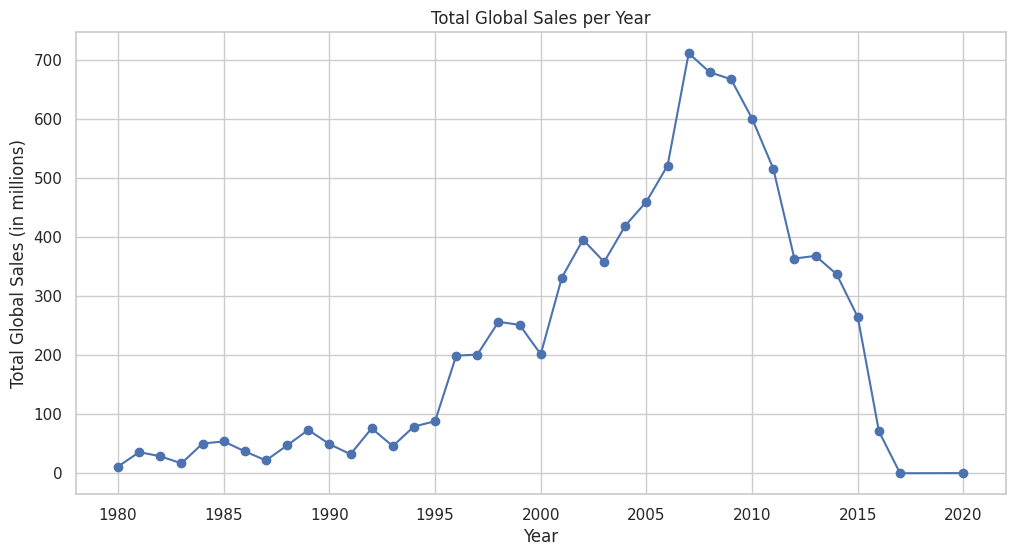

In [40]:
# Aggregate moment
global_sales_per_year = vgsales.groupby('Year')['Global_Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(global_sales_per_year['Year'], global_sales_per_year['Global_Sales'], marker='o')
plt.title('Total Global Sales per Year')
plt.xlabel('Year')
plt.ylabel('Total Global Sales (in millions)')
plt.grid(True)
plt.show()


Looking at this chart tells us that around the year 1995 there was a dramatic increase in the amount of games that were being sold. Looking farther down the graph we can see once we hit 2007 or so we peaked and have now been on a decline. This year is around the time when consoles like the Wii, Ps3, and Xbox360 were dominant.

### Genre Sales

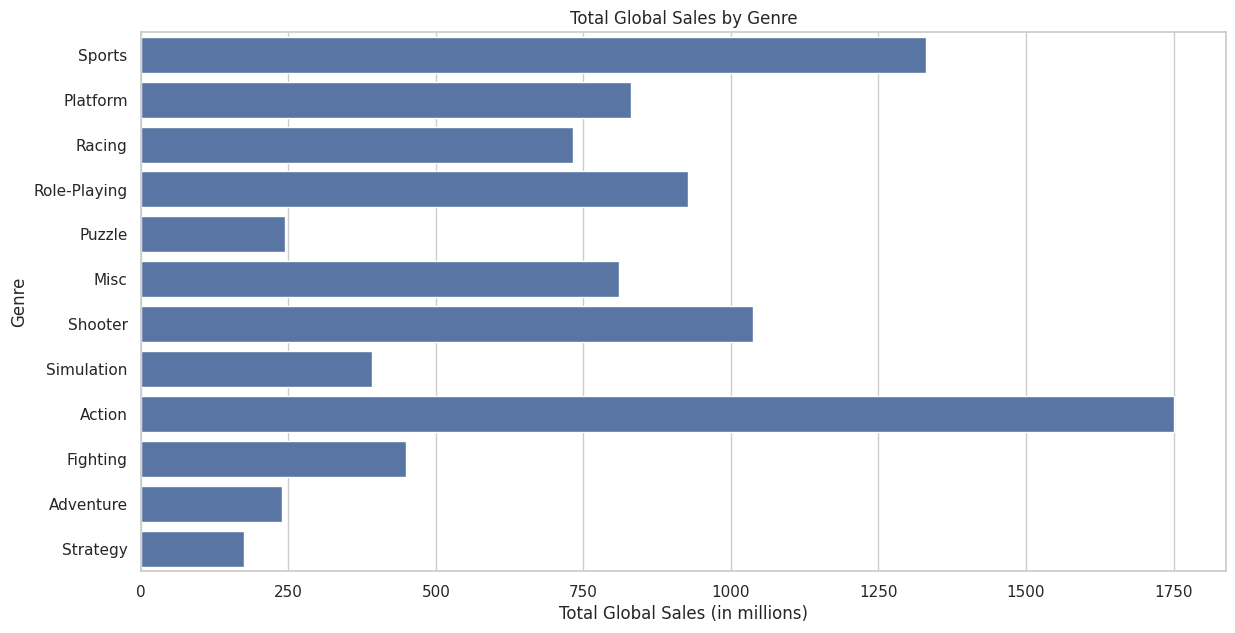

In [34]:
# Sales by Genre
plt.figure(figsize=(14, 7))
sns.barplot(x='Global_Sales', y='Genre', data=vgsales, estimator=sum, errorbar=None)
plt.title('Total Global Sales by Genre')
plt.xlabel('Total Global Sales (in millions)')
plt.ylabel('Genre')
plt.show()

With this graph we can see that Action Games are certainly the most liked genre with them having 1750 million sales globally with Sports following behind with over 1250 million sales

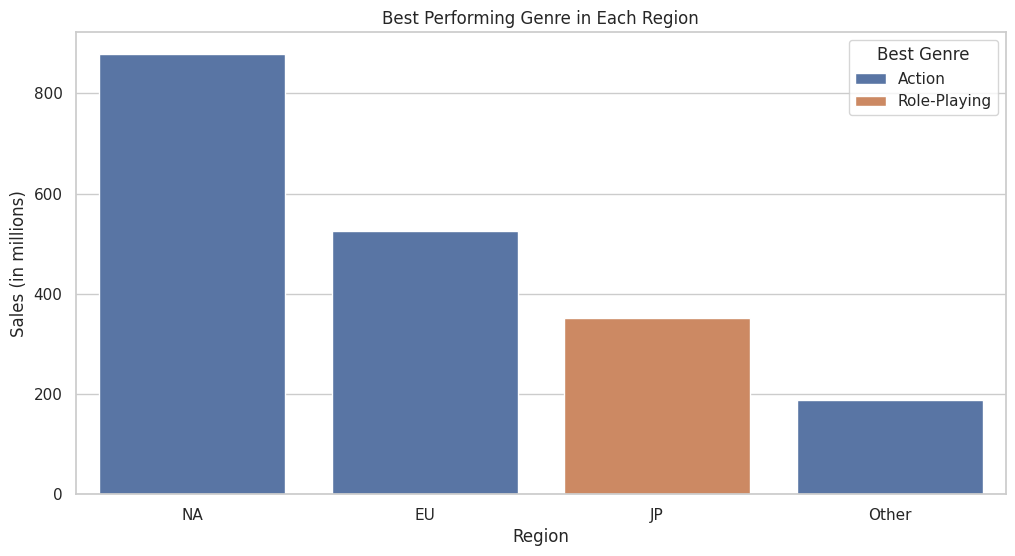

In [35]:
genre_sales = vgsales.groupby('Genre').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].reset_index()

top_genre_na = genre_sales.loc[genre_sales['NA_Sales'].idxmax()]
top_genre_eu = genre_sales.loc[genre_sales['EU_Sales'].idxmax()]
top_genre_jp = genre_sales.loc[genre_sales['JP_Sales'].idxmax()]
top_genre_other = genre_sales.loc[genre_sales['Other_Sales'].idxmax()]

best_genres = pd.DataFrame({
    'Region': ['NA', 'EU', 'JP', 'Other'],
    'Best_Genre': [top_genre_na['Genre'], top_genre_eu['Genre'], top_genre_jp['Genre'], top_genre_other['Genre']],
    'Sales': [top_genre_na['NA_Sales'], top_genre_eu['EU_Sales'], top_genre_jp['JP_Sales'], top_genre_other['Other_Sales']]
})

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Sales', hue='Best_Genre', data=best_genres, dodge=False)
plt.title('Best Performing Genre in Each Region')
plt.xlabel('Region')
plt.ylabel('Sales (in millions)')
plt.legend(title='Best Genre')
plt.show()


While the Action Genre is the best selling overall, the only place it doesnt seem to fully dominate is Japan with Role-Playing games taking up that role instead.

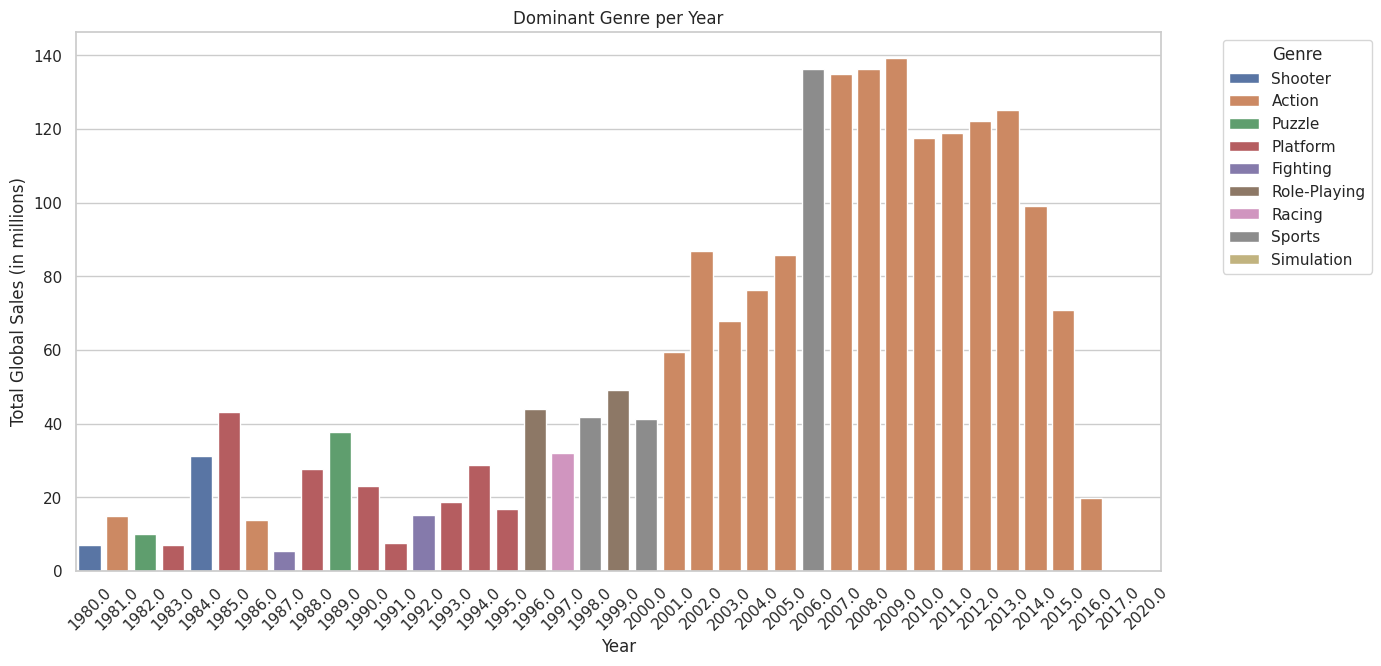

In [39]:
year_genre_sales = vgsales.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()

dominant_genres_per_year = year_genre_sales.loc[year_genre_sales.groupby('Year')['Global_Sales'].idxmax()]

plt.figure(figsize=(14, 7))
sns.barplot(x='Year', y='Global_Sales', hue='Genre', data=dominant_genres_per_year, dodge=False)
plt.title('Dominant Genre per Year')
plt.xlabel('Year')
plt.ylabel('Total Global Sales (in millions)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


With knowing that around 1995 is where the gaming sales kicked off, we can see even in this chart, shortly after game sales started to increase rapidly, Action games quickly took over the top ranks.

### Platform

### Publisher

## Data Preprocessing